In [91]:
import pandas as pd
import json
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

## Functions to format the pace column for analysis

In [92]:
# prepare the file for analysis and visualization



def time_to_seconds(time_str):
    """Converts a time string in the format 'hh:mm:ss' to seconds."""
    hours, minutes, seconds = map(float, time_str.split(':'))
    return timedelta(hours=hours, minutes=minutes, seconds=seconds).total_seconds()

def prepare_running_data(file_path):
    # Load the JSON data
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Convert time strings to datetime objects
    for col in ['date', 'sleepToBedTime', 'sleepWakeTime', 'startTime']:
        df[col] = pd.to_datetime(df[col])

    # Convert 'duration' and 'pace' to seconds
    df['duration'] = df['duration'].apply(time_to_seconds)
    df['pace'] = df['pace'].apply(time_to_seconds)

    return df

In [93]:
df = prepare_running_data('runlogJuly302023.json')

In [94]:
def convert_seconds_to_min_sec(time):
    """Converts a time string in the format 'hh:mm:ss' or 'mm:ss', or a number of seconds, to 'mm:ss' format."""
    if isinstance(time, str):
        parts = list(map(float, time.split(':')))

        if len(parts) == 3:
            hours, minutes, seconds = parts
        elif len(parts) == 2:
            hours = 0
            minutes, seconds = parts
        else:
            raise ValueError(f"Expected time string in 'hh:mm:ss' or 'mm:ss' format, but got {time}")

        time = timedelta(hours=hours, minutes=minutes, seconds=seconds).total_seconds()

    minutes = int(time // 60)
    seconds = int(time % 60)
    
    return f"{minutes}:{seconds:02d}"

df['pace'] = df['pace'].apply(convert_seconds_to_min_sec)

In [95]:
def convert_min_sec_to_minutes(time_str):
    """Converts a time string in the format 'mm:ss' to minutes."""
    minutes, seconds = map(int, time_str.split(':'))
    return minutes + seconds / 60.0

def plot_sleep_vs_pace(df):
    # Convert pace to minutes
    df['pace_minutes'] = df['pace'].apply(convert_min_sec_to_minutes)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='sleepHours', y='pace_minutes', data=df)
    plt.title('Hours of Sleep vs. Running Pace')
    plt.xlabel('Hours of Sleep')
    plt.ylabel('Pace (minutes per mile)')

    plt.show()

In [104]:
def fill_sleep_hours(df):
    """Fills null values and 0s in the 'sleepHours' column with the column's mean."""
    mean_sleep_hours = df['sleepHours'].mean()
    df['sleepHours'] = df['sleepHours'].replace({0: mean_sleep_hours}).fillna(mean_sleep_hours)
    return df

In [105]:
# Usage (assuming you have a DataFrame 'df'):
df = fill_sleep_hours(df)

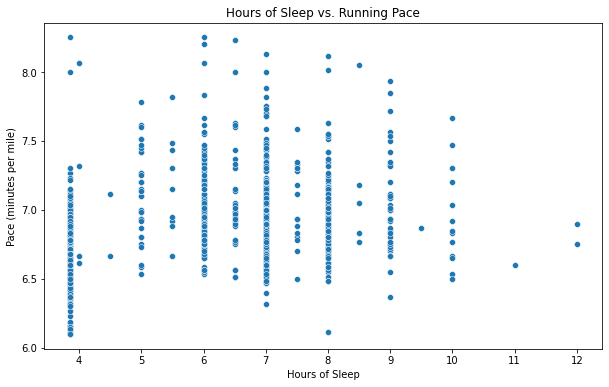

In [106]:
plot_sleep_vs_pace(df)

In [107]:
def enhanced_plot_sleep_vs_pace(df):
    # Convert pace to minutes
    df['pace_minutes'] = df['pace'].apply(convert_min_sec_to_minutes)
    
    # Create a joint plot
    g = sns.jointplot(x='sleepHours', y='pace_minutes', data=df, kind="reg")
    g.fig.suptitle('Hours of Sleep vs. Running Pace')
    g.ax_joint.set_xlabel('Hours of Sleep')
    g.ax_joint.set_ylabel('Pace (minutes per mile)')
    
    plt.show()

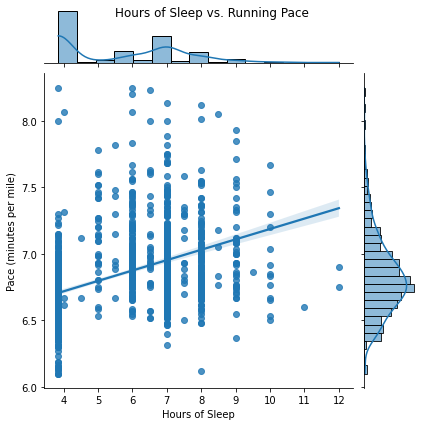

In [108]:
enhanced_plot_sleep_vs_pace(df)

In [109]:
def calculate_correlation(df):
    # Convert pace to minutes
    df['pace_minutes'] = df['pace'].apply(convert_min_sec_to_minutes)

    # Calculate the correlation
    correlation = df['sleepHours'].corr(df['pace_minutes'])
    print(f"The correlation between 'Hours of Sleep' and 'Pace' is {correlation:.2f}")


In [110]:
calculate_correlation(df)

The correlation between 'Hours of Sleep' and 'Pace' is 0.44


In [114]:
sum(df['pace'] >= '7:00')

346